In [1]:
import pandas as pd   #to create dataframe
import requests       #to send the request to the URL
from bs4 import BeautifulSoup #to get the content in the form of HTML
import numpy as np  # to count the values (in our case)

#assigning the URL with variable name url
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
#request allow you to send HTTP request
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

#creating an empty list, so that we can append the values
movie_name = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
#Note: These three list are added recently, Not explained in the video
description = []
Director = []
Stars = []

#storing the meaningfull required data in the variable
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})

#calling one by one using for loop
for store in movie_data:
    name = store.h3.a.text
    movie_name.append(name)
    
    year_of_release = store.h3.find('span', class_ = 'lister-item-year text-muted unbold').text.replace('(', '').replace(')', '')
    year.append(year_of_release)
    
    runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
    time.append(runtime)
    
    rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    meta  = store.find('span', class_ = 'metascore').text.replace(' ', '') if store.find('span', class_ = 'metascore') else '^^^^^^'
    metascore.append(meta)
    #since, gross and votes have same attributes, that's why we had created a common variable and then used indexing
    value = store.find_all('span', attrs = {'name': 'nv'})
    
    vote = value[0].text
    votes.append(vote)
    
    grosses = value[1].text if len(value) >1 else '*****'
    gross.append(grosses)
    
    # Description of the Movies -- Not explained in the Video, But you will figure it out. 
    describe = store.find_all('p', class_ = 'text-muted')
    description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
    description.append(description_)
    
    #Cast Details -- Scraping Director name and Stars -- Not explained in Video
    cast = store.find("p", class_ = '')
    cast = cast.text.replace('\n', '').split('|')
    cast = [x.strip() for x in cast]
    cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    Director.append(cast[0])
    Stars.append([x.strip() for x in cast[1].split(",")])
    
    
#creating a dataframe using pandas library
movie_DF = pd.DataFrame({'Name of movie': movie_name, 'Year of relase': year, 'Watchtime': time, 'Movie Rating': rating, 'Metascore': metascore, 'Votes': votes, 'Gross collection': gross, 'Description': description, "Director": Director, 'Star': Stars})
#Saving data in Excel file:

movie_DF.to_excel("Top_100_IMDB_Movies.xlsx")
movie_DF.head(7)


,Name of movie,Year of relase,Watchtime,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Star
0,The Shawshank Redemption,1994,142,9.3,81,"2,586,235",$28.34M,Two imprisoned men bond over a number of years...,Frank Darabont,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will..."
1,The Godfather,1972,175,9.2,100,"1,781,768",$134.97M,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"[Marlon Brando, Al Pacino, James Caan, Diane K..."
2,The Dark Knight,2008,152,9.0,84,"2,556,852",$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[Christian Bale, Heath Ledger, Aaron Eckhart, ..."
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94,"1,777,423",$377.85M,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"[Elijah Wood, Viggo Mortensen, Ian McKellen, O..."
4,Schindler's List,1993,195,9.0,94,"1,316,331",$96.90M,"In German-occupied Poland during World War II,...",Steven Spielberg,"[Liam Neeson, Ralph Fiennes, Ben Kingsley, Car..."
5,The Godfather: Part II,1974,202,9.0,90,"1,230,685",$57.30M,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"[Al Pacino, Robert De Niro, Robert Duvall, Dia..."
6,12 Angry Men,1957,96,9.0,96,"763,953",$4.36M,The jury in a New York City murder trial is fr...,Sidney Lumet,"[Henry Fonda, Lee J. Cobb, Martin Balsam, John..."


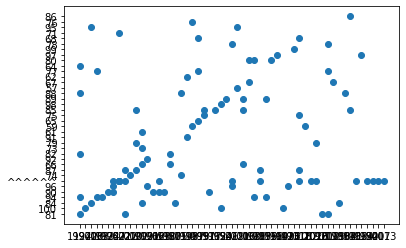

In [4]:
import matplotlib.pyplot as plt
#On peut visualiser la relation entre 2 colonne de notre data set
plt.scatter(movie_DF['Year of relase'], movie_DF['Metascore'])

<AxesSubplot:xlabel='Movie Rating'>

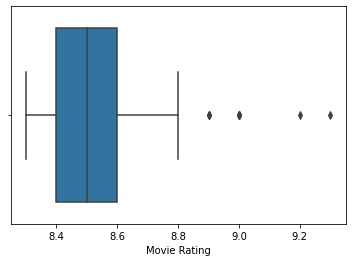

In [7]:
import numpy as np
import seaborn as sns
movie_DF['Movie Rating'] = movie_DF['Movie Rating']
sns.boxplot(x=movie_DF['Movie Rating'])

<AxesSubplot:xlabel='Movie Rating', ylabel='Watchtime'>

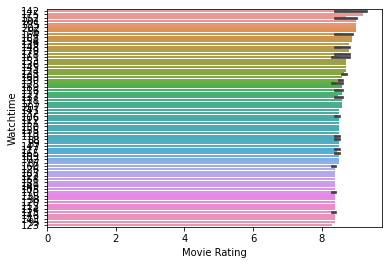

In [9]:
sns.barplot(x=movie_DF['Movie Rating'], y=movie_DF['Watchtime'])

C:\ProgramData\Anaconda3_2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Movie Rating', ylabel='Watchtime'>

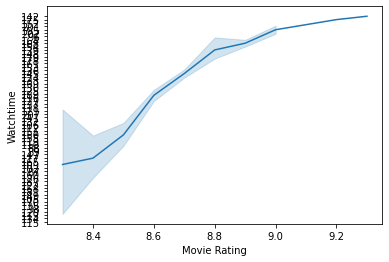

In [12]:
sns.lineplot(movie_DF['Movie Rating'], y=movie_DF['Watchtime'])

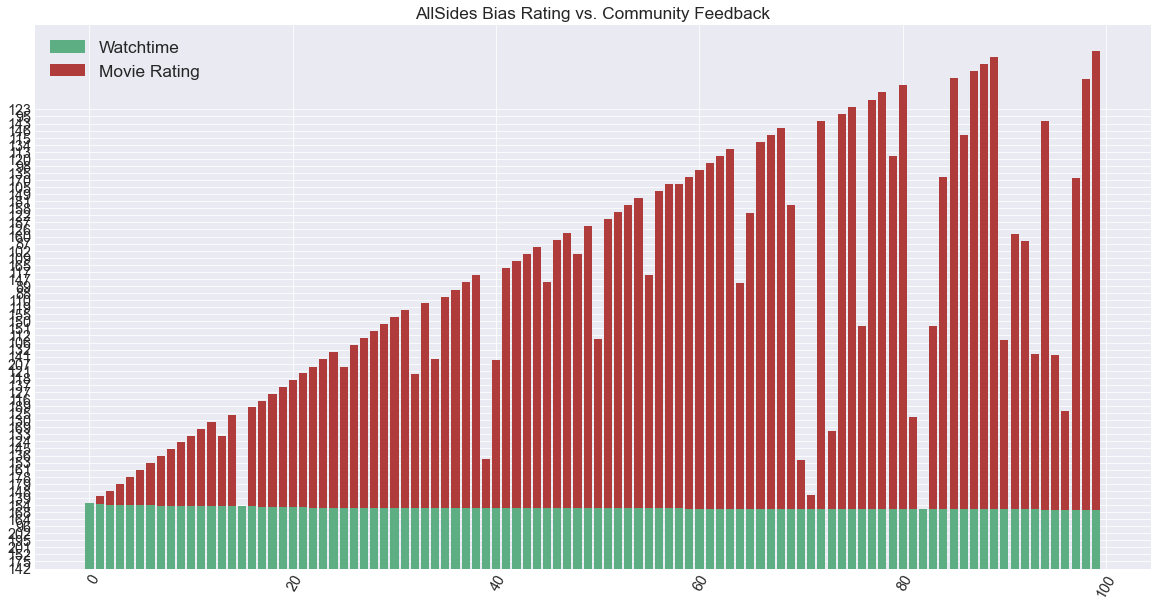

In [15]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(movie_DF.index, movie_DF['Movie Rating'], color='#5DAF83')
ax.bar(movie_DF.index, movie_DF['Watchtime'], bottom=movie_DF['Movie Rating'], color='#AF3B3B')

ax.set_ylabel = 'Total feedback'

plt.yticks(fontsize='x-large')
plt.xticks(rotation=60, ha='right', fontsize='x-large', rotation_mode='anchor')

plt.legend(['Watchtime', 'Movie Rating'], fontsize='xx-large')
plt.title('AllSides Bias Rating vs. Community Feedback', fontsize='xx-large')
plt.show()